In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Correct the data in the "height" column by replacing it with random numbers between 150 and 180.

file_path = 'C:/Users/97155/Downloads/New folder/myexcel.xlsx'  
df = pd.read_excel(file_path)


df['Height']=np.random.randint(150, 180,size=458)

df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,175,180,Texas,7730337.0,170
1,Jae Crowder,Boston Celtics,99,SF,25,156,235,Marquette,6796117.0,177
2,John Holland,Boston Celtics,30,SG,27,179,205,Boston University,NaN,175
3,R.J. Hunter,Boston Celtics,28,SG,22,153,185,Georgia State,1148640.0,178
4,Jonas Jerebko,Boston Celtics,8,PF,29,166,231,NaN,5000000.0,173


In [2]:
## 2.  Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.
team_distribution = df['Team'].value_counts()
total_employees = len(df)
team_percentage = (team_distribution / total_employees) * 100


team_distribution_df = pd.DataFrame({
    'count': team_distribution,
    'percentage': team_percentage
})

print(team_distribution_df)

                        count  percentage
Team                                     
New Orleans Pelicans       19    4.148472
Memphis Grizzlies          18    3.930131
Utah Jazz                  16    3.493450
New York Knicks            16    3.493450
Milwaukee Bucks            16    3.493450
Brooklyn Nets              15    3.275109
Portland Trail Blazers     15    3.275109
Oklahoma City Thunder      15    3.275109
Denver Nuggets             15    3.275109
Washington Wizards         15    3.275109
Miami Heat                 15    3.275109
Charlotte Hornets          15    3.275109
Atlanta Hawks              15    3.275109
San Antonio Spurs          15    3.275109
Houston Rockets            15    3.275109
Boston Celtics             15    3.275109
Indiana Pacers             15    3.275109
Detroit Pistons            15    3.275109
Cleveland Cavaliers        15    3.275109
Chicago Bulls              15    3.275109
Sacramento Kings           15    3.275109
Phoenix Suns               15    3

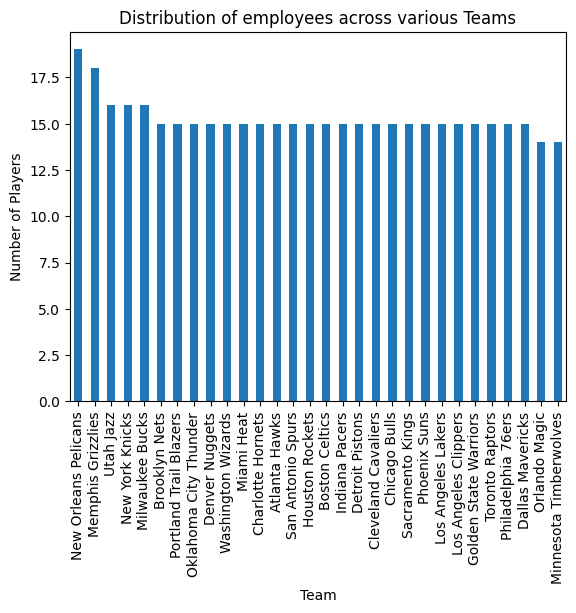

In [3]:

Employees_in_each_Team =df.value_counts('Team')
Percentage_Split_Relative = Employees_in_each_Team/Employees_in_each_Team.sum()*100
Percentage_Split_Relative

counts = df['Team'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Distribution of employees across various Teams')
plt.show()




In [4]:
#3 . Segregate employees based on their positions within the company. (2 marks)\

positions = df['Position'].unique()

position_groups = {position: df[df['Position'] == position] for position in positions}


for position, group in position_groups.items():
    print(f"Position: {position}, Number of Employees: {len(group)}")

Position: PG, Number of Employees: 92
Position: SF, Number of Employees: 85
Position: SG, Number of Employees: 102
Position: PF, Number of Employees: 100
Position: C, Number of Employees: 79


In [5]:

Empolyees_Sort_Position = df.sort_values(by="Position",ascending=False)
Empolyees_Sort_Position.value_counts('Position')


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

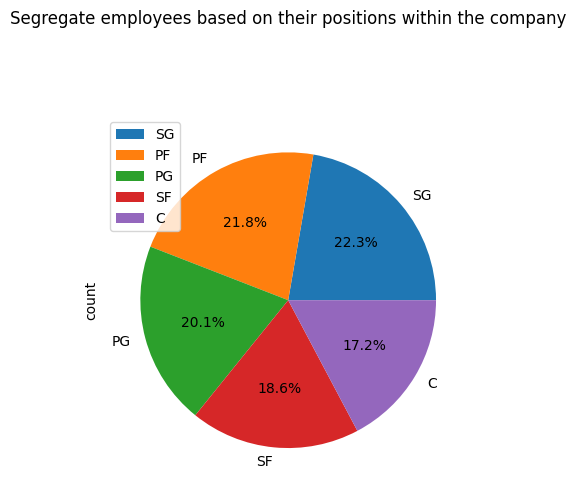

In [15]:
Empolyees_Sort_Position.value_counts('Position').plot(kind="pie",autopct='%1.1f%%')
plt.title('Segregate employees based on their positions within the company\n\n\n\n')
plt.legend() # shows label
plt.show()

In [6]:
## 3) Identify the predominant age group among employees. (2 marks)

Predominant_Age = df.value_counts('Age')
Predominant_Age

Age
24    47
25    46
27    41
23    41
26    36
30    31
28    31
29    28
22    26
31    22
21    19
20    19
33    14
32    13
34    10
36    10
35     9
38     4
37     4
40     3
39     2
19     2
Name: count, dtype: int64

In [7]:

age_groups = df['Age'].value_counts().sort_index()


predominant_age_group = age_groups.idxmax()
predominant_age_group_count = age_groups.max()

print(f"The predominant age  among employees is {predominant_age_group} years old with {predominant_age_group_count} employees.")


The predominant age  among employees is 24 years old with 47 employees.


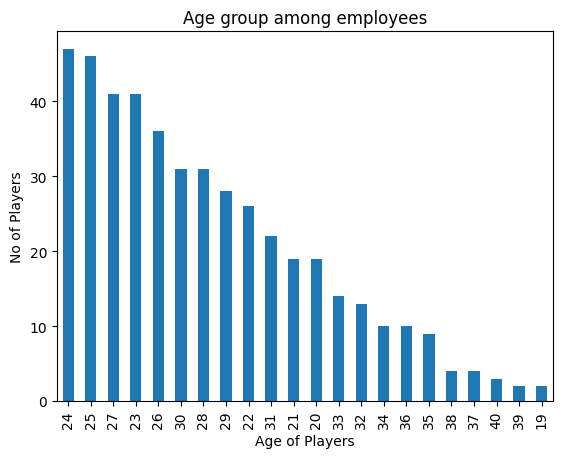

In [8]:
Predominant_Age.plot(kind='bar')
plt.xlabel('Age of Players')
plt.ylabel('No of Players')
plt.title('Age group among employees')
plt.show()


In [9]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


age_group_distribution = df['age_group'].value_counts()


predominant_age_group = age_group_distribution.idxmax()


print(f"The predominant age group is: {predominant_age_group}")

The predominant age group is: 21-30


In [10]:
###4) Discover which team and position have the highest salary expenditure. (2 marks)

salary_exp_by_team = df.groupby(['Team'])[['Salary']].sum()

In [11]:
Team_highest_Exp =salary_exp_by_team['Salary'].sort_values(ascending = False)
Team_highest_Exp .head()

Team
Cleveland Cavaliers      106988689.0
Los Angeles Clippers      94854640.0
Oklahoma City Thunder     93765298.0
Golden State Warriors     88868997.0
Chicago Bulls             86783378.0
Name: Salary, dtype: float64

In [12]:
salary_expenditure = df.groupby(['Team'])['Salary'].sum().reset_index()

max_expenditure = salary_expenditure.loc[salary_expenditure['Salary'].idxmax()]
print(f"The team with the highest salary expenditure is: {max_expenditure['Team']}")

The team with the highest salary expenditure is: Cleveland Cavaliers


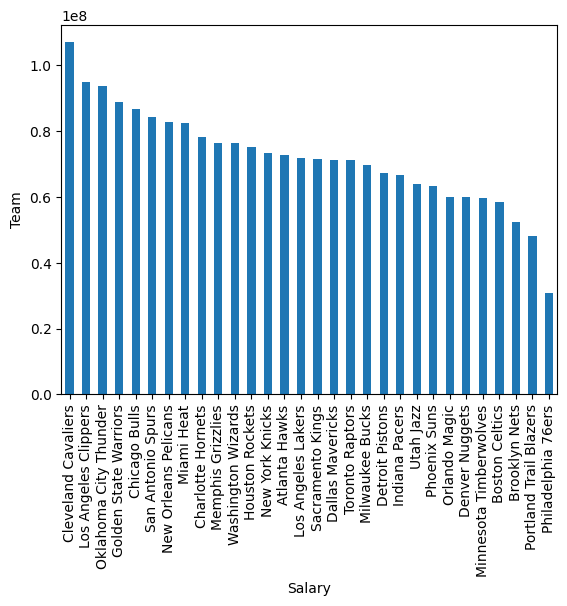

In [13]:
Team_highest_Exp.plot(kind='bar')
plt.xlabel('Salary')
plt.ylabel('Team')
plt.show()

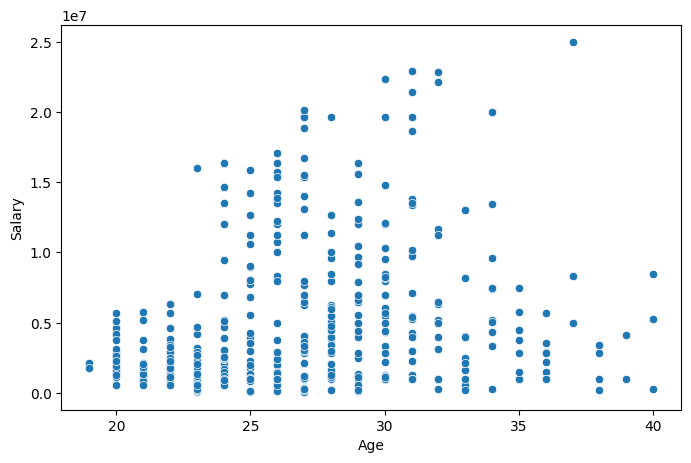

In [14]:

#5) Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)


plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(y="Salary",x="Age",data=df)
plt.xlabel("Age")
plt.ylabel("Salary")

plt.show()